## PF14 SEED 0 ##

In [2]:
import os
import torch
import numpy as np

from CODE.AttentionDCA_python.src.plot_functions import contact_plot
from CODE.AttentionDCA_python.src.dcascore import score, compute_PPV
from CODE.AttentionDCA_python.src.utils import quickread

cwd = os.getcwd()
print(cwd)

filename = cwd + '/CODE/DataAttentionDCA/data/PF00014/PF00014_mgap6.fasta.gz'
structfile = cwd + '/CODE/DataAttentionDCA/data/PF00014/PF00014_struct.dat'

Z, W = quickread(filename)
W = W / W.sum()
q = int(Z.max()) + 1
N, M = Z.shape

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA
Total sequences read: 13600
Sequences after filtering: 13600
Sampling 100000 pairs out of 39342885 total pairs.
Mean fraction of identical positions (sampled): 0.3672818677608664
Computed theta: 0.3310808691464523


100%|██████████| 8871/8871 [00:02<00:00, 4011.93it/s]

2950.925530761667


In [3]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor

In [4]:
loss_type = 'without_J'

family = 'PF14_HLT_seed0'
H = 32
d= 23
epochs = 500
K32_23_pf14_seed0 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_pf14_seed0 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_pf14_seed0 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

In [5]:
ranking32_23_pf14_seed0, _ = score(Q32_23_pf14_seed0, K32_23_pf14_seed0, V32_23_pf14_seed0)

53


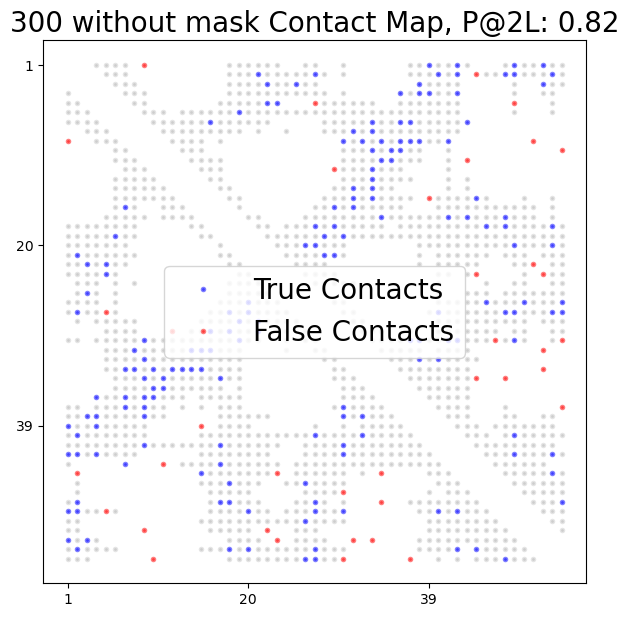

In [6]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 2 * N
# Call the contact_plot function
figurename = '300 without mask'
fake32_23_pf14_seed0 = contact_plot(ranking32_23_pf14_seed0, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/plot_functions.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


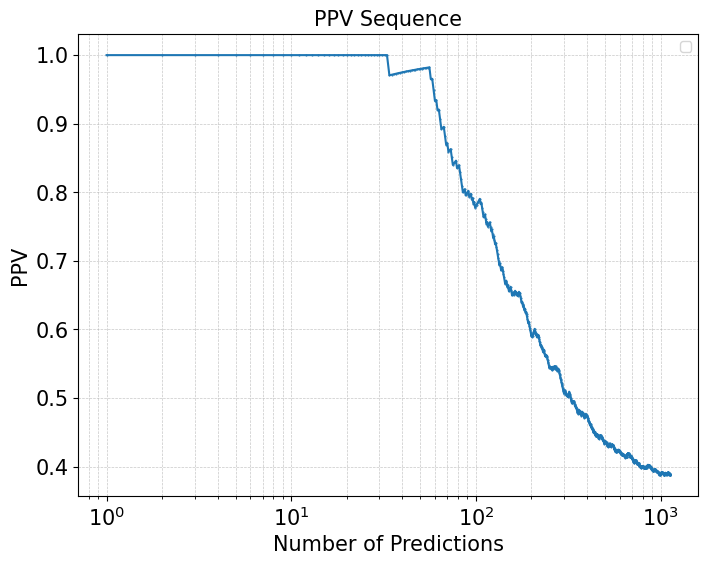

In [7]:
from CODE.AttentionDCA_python.src.dcascore import compute_PPV
from CODE.AttentionDCA_python.src.plot_functions import graphPPV
PPV32_23_seed0 = [compute_PPV(ranking32_23_pf14_seed0, structfile)]
labels = ["48"]
figtitle = "PPV Sequence"



graphPPV(PPV32_23_seed0,labels,figtitle, fig_size=(8, 6))



## Compression factor ##

In [8]:
#compression factor
H, d, L = Q32_23_pf14_seed0.shape
N = L
H, q, q = V32_23_pf14_seed0.shape

cr = (2*H*d*L+ H*q**2)/(L*(L-1)*q**2 *.5 + L*q)



In [9]:
cr

0.13995132596337773

In [10]:
#provaimo compression ratio so that it is 0.15
cr = 0.015
d = (cr*L*(L-1)*q**2 *.5 + L*q - H*q**2)/(2*H*L)


## PF14 seed julia ##

In [11]:
loss_type = 'without_J'

family = 'PF14_HLT_seed_julia'
H = 32
d= 23
epochs = 500
K32_23_pf14_seed_julia = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_pf14_seed_julia = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_pf14_seed_julia = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

In [12]:
ranking32_23_pf14_seed_julia, _ = score(Q32_23_pf14_seed_julia, K32_23_pf14_seed_julia, V32_23_pf14_seed_julia)

53


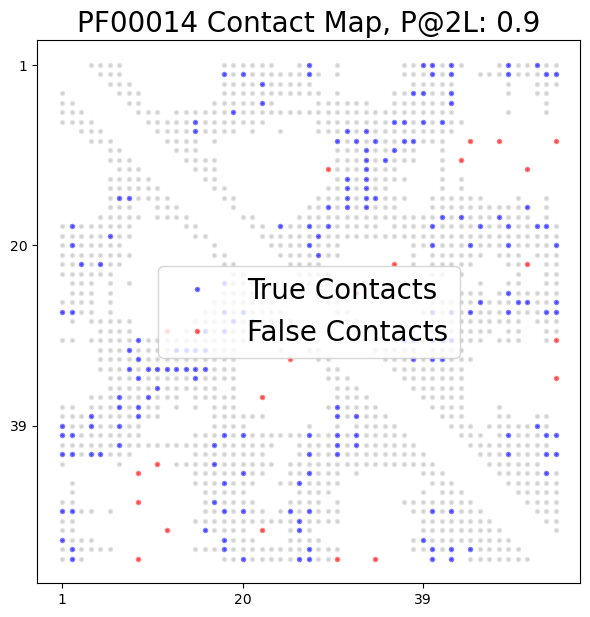

In [13]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 2 * N
# Call the contact_plot function
figurename = 'PF00014'
fake32_23_pf14_seed_julia = contact_plot(ranking32_23_pf14_seed_julia, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



53


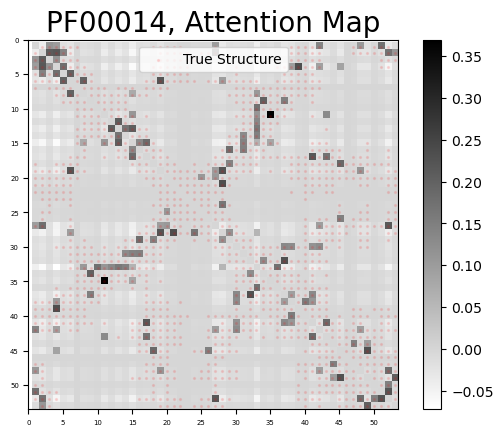

In [18]:
from CODE.AttentionDCA_python.src.plot_functions import graphAtt

N =Q32_23_pf14_seed_julia.shape[-1]
print(N)
# Define other parameters
family = 'PF00014'

PFname = family

ticks = np.arange(0, N, 5)  # Example tick positions

k=10

# Call graphAtt function
graphAtt(Q32_23_pf14_seed_julia, K32_23_pf14_seed_julia, V32_23_pf14_seed_julia, 
         structfile, PFname, ticks, k=k, version='mean', sqr=False, APC=True, all = False )

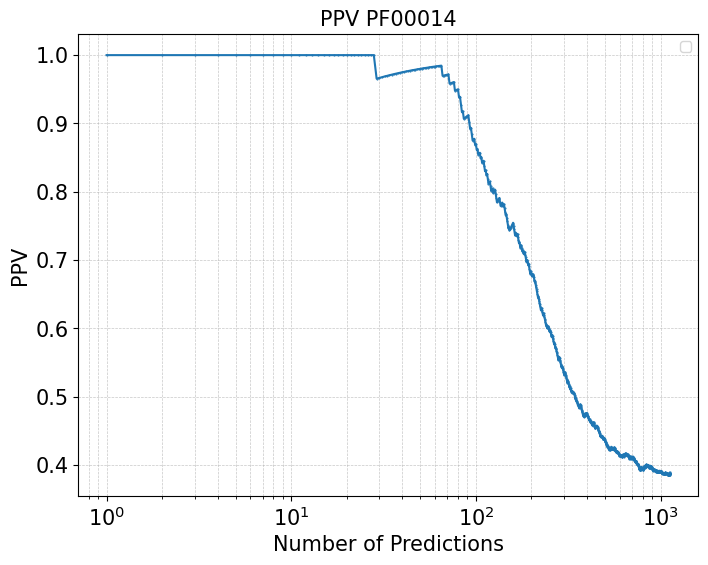

In [14]:
from CODE.AttentionDCA_python.src.dcascore import compute_PPV
from CODE.AttentionDCA_python.src.plot_functions import graphPPV
PPV32_23_seed_julia = [compute_PPV(ranking32_23_pf14_seed_julia, structfile)]
labels = ["48"]
figtitle = "PPV PF00014"
graphPPV(PPV32_23_seed_julia,labels,figtitle, fig_size=(8, 6))



## PF14 all seed together ##

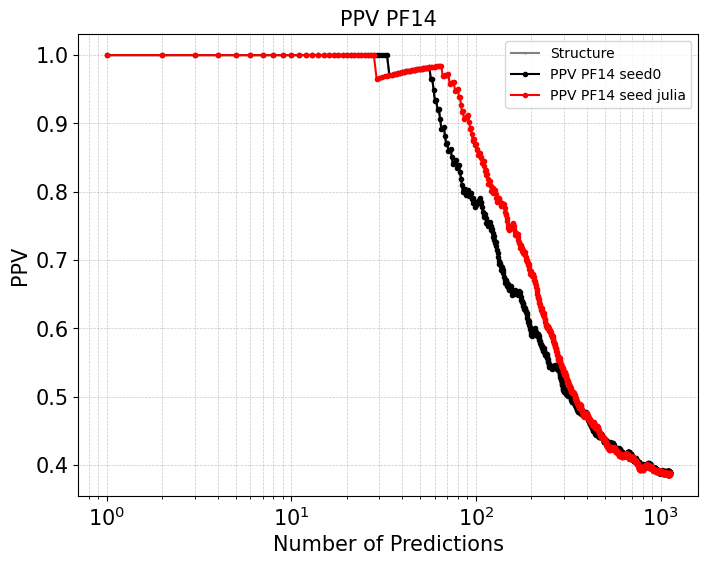

In [15]:
from CODE.AttentionDCA_python.src.dcascore import compute_PPV
from CODE.AttentionDCA_python.src.plot_functions import graphPPV
PPVs32_23 = [PPV32_23_seed0[0], PPV32_23_seed0[0], PPV32_23_seed_julia[0]]
labels = ["PPV PF14 seed0", "PPV PF14 seed julia"]
figtitle = "PPV PF14"
graphPPV(PPVs32_23,labels,figtitle, fig_size=(8, 6))



## HK-RR seed0 ##

In [37]:
cwd = os.getcwd()
print(cwd)

filename = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_concatenated_nodupli.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

Z, W = quickread(filename)
W = W / W.sum()
q = int(Z.max()) + 1
N, M = Z.shape

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA
Total sequences read: 15539
Sequences after filtering: 15539
Sampling 100000 pairs out of 120722491 total pairs.
Mean fraction of identical positions (sampled): 0.3129639591178053
Computed theta: 0.3885431419731867


100%|██████████| 15539/15539 [00:13<00:00, 1173.46it/s]

3515.9189003436304


In [38]:
family = 'HK-RR_wo_new_mask_newhope_correct'
H = 32
d= 23
n_epochs = 300
K32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

176


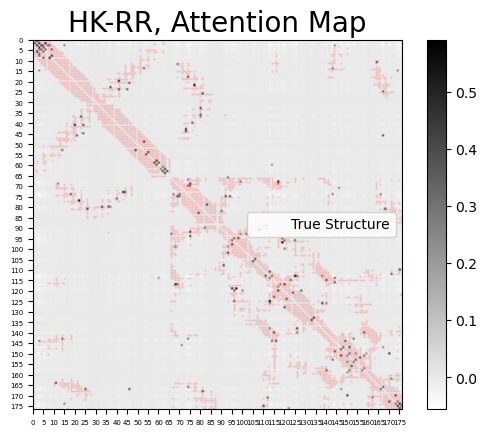

In [39]:
N =Q32_23_wo_mask.shape[-1]
print(N)
# Define other parameters
family = 'HK-RR'
H = 32
d= 23
epochs = 300

PFname = family

ticks = np.arange(0, N, 5)  # Example tick positions

k=10

# Call graphAtt function
graphAtt(Q32_23_wo_mask, K32_23_wo_mask, V32_23_wo_mask, 
         structfile, PFname, ticks, k=k, version='mean', sqr=False, APC=True, all = False )

In [40]:
ranking32_23_wo_mask, _ = score(Q32_23_wo_mask, K32_23_wo_mask, V32_23_wo_mask)

176


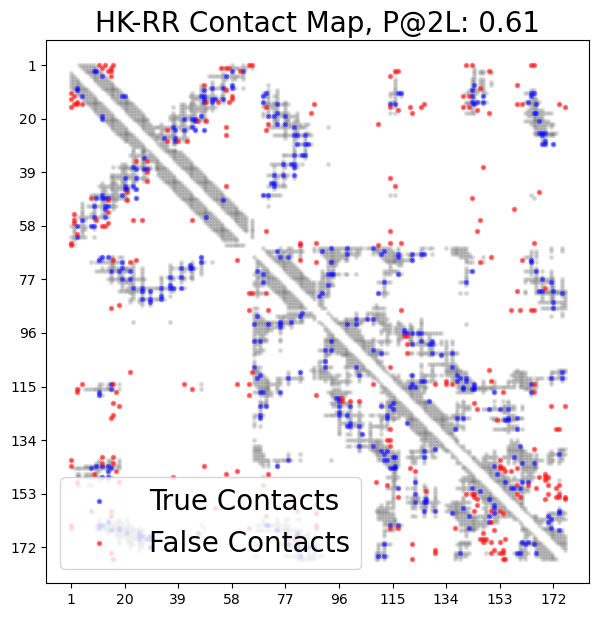

In [41]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 2*N
# Call the contact_plot function

figurename = 'HK-RR'
fake32_23_wo_mask = contact_plot(ranking32_23_wo_mask, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/plot_functions.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


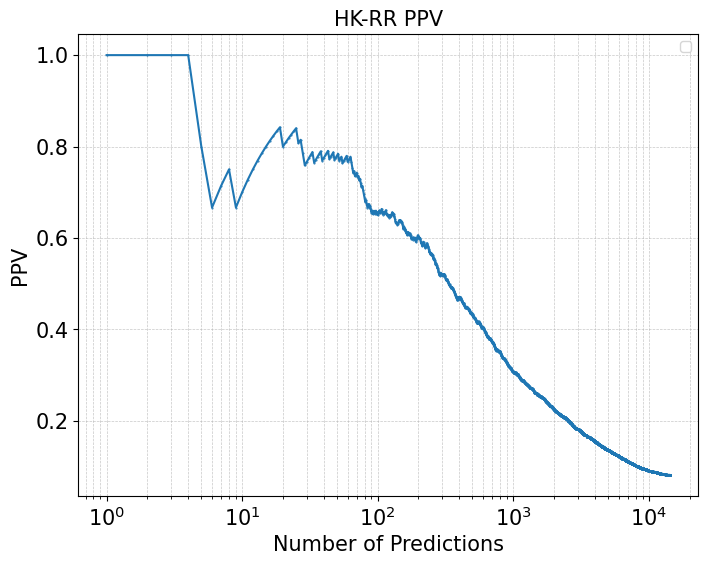

In [26]:
PPv =compute_PPV(ranking32_23_wo_mask, structfile)
PPVs =[PPv]
labels = ["HK-RR"]
from CODE.AttentionDCA_python.src.plot_functions import graphAtt, graphPPV
figtitle = 'HK-RR PPV'
graphPPV(PPVs, labels, figtitle)

## PF72 seed 0 ##

In [27]:
filename = cwd + '/CODE/DataAttentionDCA/data/PF00076/PF00076_mgap6.fasta.gz'
structfile = cwd + '/CODE/DataAttentionDCA/data/PF00076/PF00076_struct.dat'

Z, W = quickread(filename)
W = W / W.sum()
q = int(Z.max()) + 1
N, M = Z.shape

Total sequences read: 137605
Sequences after filtering: 137605
Sampling 100000 pairs out of 3149441295 total pairs.
Mean fraction of identical positions (sampled): 0.24316878334410255
Computed theta: 0.5


100%|██████████| 79366/79366 [03:06<00:00, 424.73it/s] 


5433.618536488186


In [28]:
loss_type = 'without_J'

family = 'PF76_HLT_seed_0'
H = 32
d= 23
epochs = 500
K32_23_pf76_seed0 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_pf76_seed0 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_pf76_seed0 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

In [29]:
ranking32_23_pf76_seed0, _ = score(Q32_23_pf76_seed0, K32_23_pf76_seed0, V32_23_pf76_seed0)

70


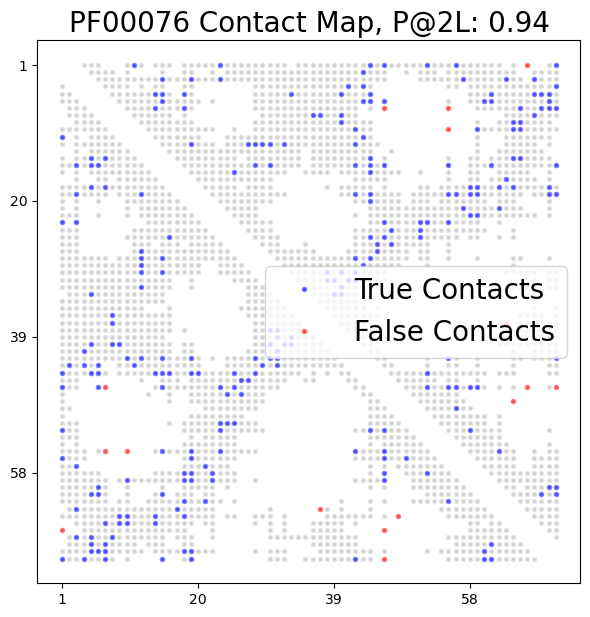

In [30]:
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 2* N
# Call the contact_plot function
figurename = 'PF00076'
fake32_23_pf76_seed0 = contact_plot(ranking32_23_pf76_seed0, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



70


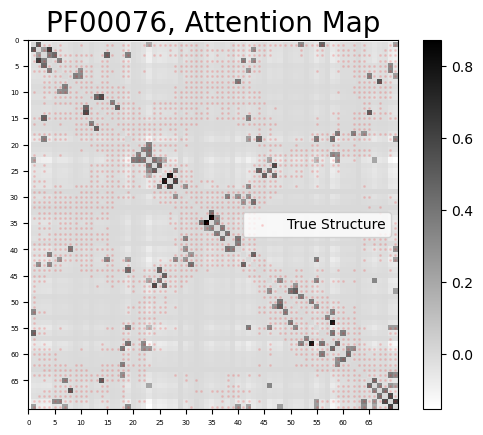

In [33]:
from CODE.AttentionDCA_python.src.plot_functions import graphAtt

N =Q32_23_pf76_seed0.shape[-1]
print(N)
# Define other parameters
family = 'PF00076'

PFname = family

ticks = np.arange(0, N, 5)  # Example tick positions

k=10

# Call graphAtt function
graphAtt(Q32_23_pf76_seed0, K32_23_pf76_seed0, V32_23_pf76_seed0, 
         structfile, PFname, ticks, k=k, version='mean', sqr=False, APC=True, all = False )

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/plot_functions.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


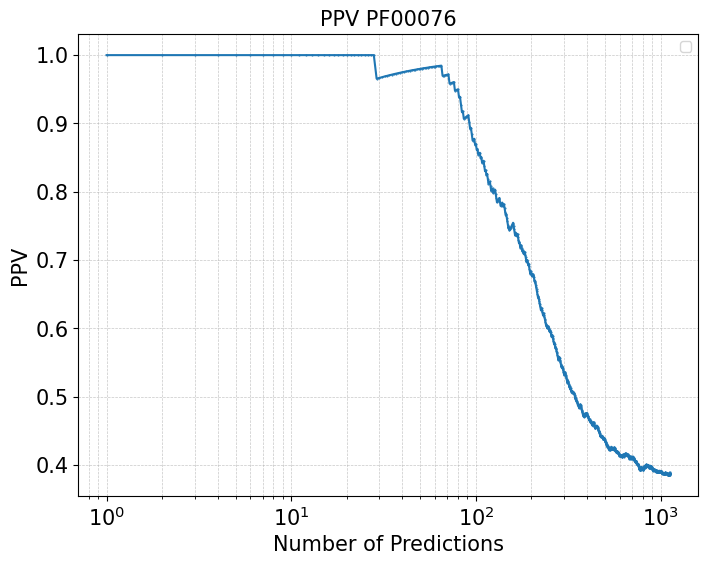

In [32]:
from CODE.AttentionDCA_python.src.dcascore import compute_PPV
from CODE.AttentionDCA_python.src.plot_functions import graphPPV
PPV32_23__pf76_seed0 = [compute_PPV(ranking32_23_pf76_seed0, structfile)]
labels = ["48"]
figtitle = "PPV PF00076"
graphPPV(PPV32_23_seed_julia,labels,figtitle, fig_size=(8, 6))

